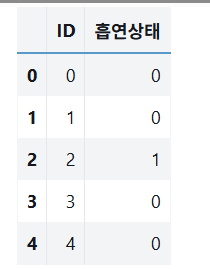

데이터 설명 : 2018년도 성인의 건강검 진데이터 (종속변수 : 흡연상태 1- 흡연, 0-비흡연 )
건강검진 상태를 보고 흡연여부를 예측하라

In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_test.csv")


display(X_train.head())
display(X_test.head())
X_train.isnull().sum().sum()

,ID,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0.0,Y
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0.0,Y
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0.0,N
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0.0,Y
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0.0,N


,ID,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
0,8,M,80,160,65,91.0,0.9,0.7,1.0,1.0,...,94.0,14.5,1.0,1.0,29.0,19.0,39.0,Y,0.0,N
1,17,M,30,165,90,98.0,1.5,1.5,1.0,1.0,...,165.0,15.6,1.0,0.9,20.0,37.0,34.0,Y,0.0,N
2,20,M,40,170,75,81.0,1.5,1.5,1.0,1.0,...,98.0,16.4,1.0,0.7,25.0,32.0,73.0,Y,0.0,N
3,24,M,35,175,70,80.0,1.0,1.0,1.0,1.0,...,160.0,15.3,1.0,0.7,30.0,55.0,50.0,Y,0.0,N
4,25,M,35,160,75,93.0,1.0,1.2,1.0,1.0,...,132.0,14.7,1.0,1.1,35.0,58.0,56.0,Y,0.0,N


np.int64(0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((44553, 26), (44553, 2), (11139, 26))

In [ ]:
# #X_train의 ID와 y_train의 ID가 순서까지 같기 때문에 그냥 concat으로 붙일 수 있는것임
# y_train = y_train.drop('ID', axis=1)
# X_train =pd.concat([X_train, y_train], axis=1)

In [ ]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/smoke/x_test.csv")


#ID를 기준으로 정확하게 붙이고 싶으면 merge를 써라 concat은 그냥 인덱스 기준 순서로 붙이기 때문에 문제의 우려가 있긴함
#하지만 merge는 붙이기 전에 각 ID등 붙이려는 값이 고유값인지 확인해야함 그래서  X_train['ID'].is_unique 이런식으로했을때 True뜨면 고유값이라는것이라 문제없이 붙여도 된다는것!
# print(X_train['ID'].is_unique)
# print(y_train['ID'].is_unique)
X_train = X_train.merge(y_train, on='ID', how='left')
y_train = y_train.drop('ID', axis=1)
target = X_train.pop('흡연상태')
X_test_id = X_test.pop('ID')
X_train = X_train.drop(['ID','구강검진수검여부'],axis=1)
X_test = X_test.drop('구강검진수검여부', axis=1)

# X_train.select_dtypes(include = 'object')

# X_train.isnull().sum()
# X_test.isnull().sum()

#scaler
from sklearn.preprocessing import RobustScaler
col_scaling = X_train.select_dtypes(exclude = 'object').columns #여기 .columns 안쓰면 오류남
scaler= RobustScaler()
X_train[col_scaling] = scaler.fit_transform(X_train[col_scaling])
X_test[col_scaling] = scaler.transform(X_test[col_scaling])



# #라벨 인코딩
from sklearn.preprocessing import LabelEncoder
cols = X_train.select_dtypes(include='object')

for col in cols:
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])


#데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size=0.2,
                                            random_state=2025)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape


#랜포모델
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=2025,n_estimators =500)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
pred_proba = model.predict_proba(X_val)

#검증
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
print(f"f1_score : {f1_score(y_val, pred)}")
print(f"recall_score : {recall_score(y_val,pred)}")
print(f"precision_score : {precision_score(y_val,pred)}")
print(f"roc_auc_score : {roc_auc_score(y_val,pred_proba[:,1])}")




#일반 (random_state=2025포함)
f1_score : 0.6677495569994093
recall_score : 0.6899603295697284
precision_score : 0.6469241773962804
roc_auc_score : 0.8314786397032


#n_estimators =300
f1_score : 0.6759653501688445
recall_score : 0.702471772963076
precision_score : 0.6513865308432372
roc_auc_score : 0.8343375246132483

#n_estimators =500
f1_score : 0.6806390150959988
recall_score : 0.7085749160817821
precision_score : 0.6548223350253807
roc_auc_score : 0.8358118550684415

#test데이터 학습 및 제출
pred= model.predict(X_test)

result = pd.DataFrame({
              'ID' : X_test_id,
              '흡연여부' : pred
})

result.to_csv("흡연여부22132.csv", index=False)



f1_score : 0.6806390150959988
recall_score : 0.7085749160817821
precision_score : 0.6548223350253807
roc_auc_score : 0.8358118550684415
